### B2B SVD

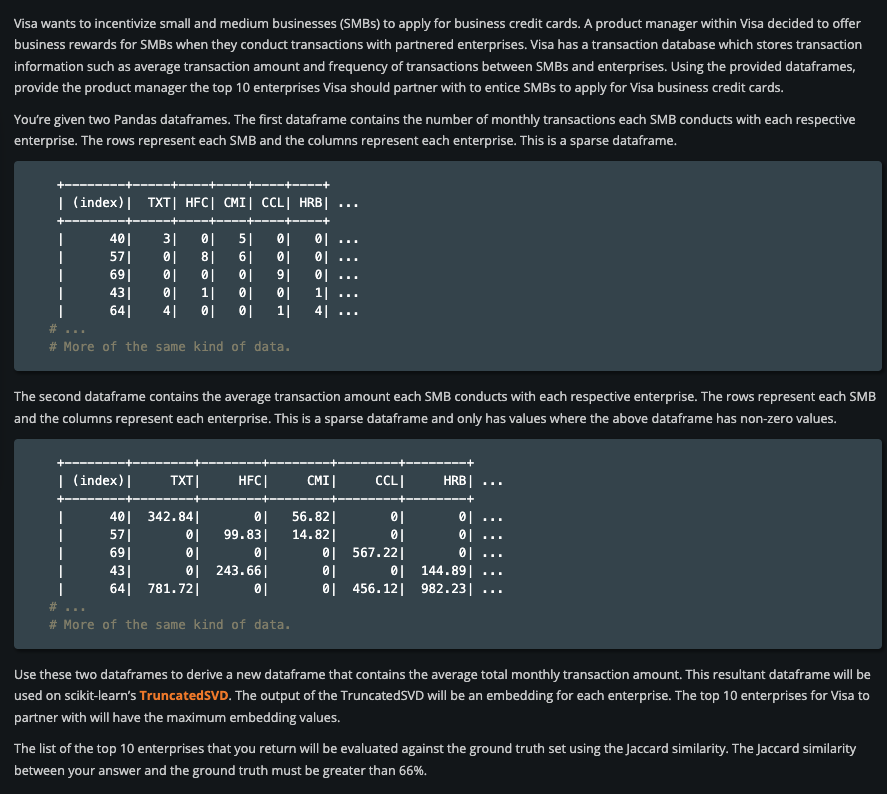

In [ ]:
"""
Pseudo Code and Comments
1. Features - # of Monthtly Transactions, Avg Transaction Amount, Avg Total monthly tx amount (feature engineering)
2. Label - No
3. Outcome - Top 10 enterprise partners for Visa
4. Model - 
    Truncated SVD
    Objective : min || A - X ||, while minimizing rank(X) < k, Where X = QQ*A
    So to get a smaller rank matrix that is approximate representation
    Performance : 66% JAccard Similarity

5. Approach -
    1. Generate average monthly total features
    2. Use SVD to get enterprse embeddings
    3. Find the top 10 enterprise with the highest embedding values
"""
from sklearn.decomposition import TruncatedSVD

def b2b_svd(avg_trxn_amount, num_monthly_trxn):
    # Write your code here
    average_monthly_total = avg_trxn_amount.mul(num_monthly_trxn)
    average_monthly_total_T = average_monthly_total.T # Now rows be the enterprose
    enterprise_svd = TruncatedSVD(n_components=10, n_iter=10) 
    # Embedding of enterprise, by series of 10 numbers
    enterprise_embeddings = enterprise_svd.fit_transform(average_monthly_total_T)
    max_enterprise_embeddings = enterprise_embeddings.argmax(axis=0)
    # For each row, tell me index of max value or we can sum up the entire row and get jaccard similarity
    # Higher value with higher embedding will give value if we do dot product or other similarity
    max_enterprise_rows = average_monthly_total_T.iloc[max_enterprise_embeddings]
    
    return list(max_enterprise_rows.index.values)